<img src="./unal.png" align=left width="150" height="150"></img>

$\;$

---
<h2 align="center">Modelos con sobredispersión (Ratas embarazadas)</h2>

(Morel y Neerchal (2012, página 103)) Los datos provienen de un experimento con ratas embarazadas. El propósito fue investigar el efecto sinérgico de fenitoína (PHT) y óxido de tricloropropeno (TCPO) sobre la presencia o ausencia de osificación en las
falanges de los fetos, lo cual se considera una medida del efecto teratogénico de estas sustancias. Las ratas recibieron diariamente, por sonda gástrica, la dosis de PHT (0 o 60 mg/kg) y TCPO (0 o 100 mg/kg). El día 18 de gestación los fetos de cada una de las 81 ratas se recuperaron, se tiñeron, y se limpiaron. Luego, mediante inspección visual, se determinó la presencia o ausencia de osificación para las diferentes articulaciones de las patas delanteras derecha e izquierda. Estos datos se encuentran en el archivo teratogenico.xls, donde

* **pht:** Dosis de PHT.  (0 o 60 mg/kg)
* **tcpo:** Dosis de TCPO. (0 o 100 mg/kg)
* **fetuses:** Número total de fetos.
* **ossification:** Número de fetos con presencia de osificación.

In [9]:
setwd("")  #Asignando capeta busqueda por default
library(sqldf)
library(numDeriv)
library(Rfast)
source("macros.txt")
source("test.txt")

In [12]:
###################### Lectura de los datos ######################
library(readxl)
tera <- read_excel("teratogenico.xls.xlsx")                                         #Leyendo Archivos.
str(tera)
#head(tera,n=10)
#tera<-read.table("teratogenico.txt", header=TRUE, dec=",")
head(tera)

Classes 'tbl_df', 'tbl' and 'data.frame':	81 obs. of  4 variables:
 $ pht         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ tcpo        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ fetuses     : num  8 9 9 5 3 8 10 8 8 6 ...
 $ ossification: num  8 9 7 0 3 5 9 5 5 1 ...


pht,tcpo,fetuses,ossification
0,0,8,8
0,0,9,9
0,0,9,7
0,0,5,0
0,0,3,3
0,0,8,5


# A)

Ajuste MLGs binomial con funciones de enlace logit, probit y complemento loglog, y las covariables categóricas dosis de PHT, dosis de TCPO, y la interacción entre estas. Use los criterios AIC y BIC para seleccionar el “mejor” modelo. Evalúe
si hay indicios de la presencia de sobredispersión.

In [15]:
###################### Estimación del modelo ######################
fit11 <- glm(ossification/fetuses ~ factor(pht) * factor(tcpo), weights=fetuses, family=binomial(link="logit"), data=tera)
fit12 <- glm(ossification/fetuses ~ factor(pht) * factor(tcpo), weights=fetuses, family=binomial(link="probit"), data=tera)
fit13 <- glm(ossification/fetuses ~ factor(pht) * factor(tcpo), weights=fetuses, family=binomial(link="cloglog"), data=tera)

Para poder especificar el mejor modelo en términos de AIC, BIC se tiene:

In [58]:
###################### Valores del AIC y BIC ######################
AIC(fit11,fit12,fit13)
BIC(fit11,fit12,fit13)

,df,AIC
fit11,4,409.7828
fit12,4,409.7828
fit13,4,409.7828


,df,BIC
fit11,4,419.3606
fit12,4,419.3606
fit13,4,419.3606


Aquí se puede establecer que los BIC, AIC de los anteirores modelos son iguales, en este orden de ideas se selecciona el modelo binomial con función de enlace canonica.

En la siguiente estimación de los parámetros se puede identificar que los parámetros de los efectos principales son negativos, además significativos y la estimacion de la interacción es positiva lo cual implica que cuando se les inyecta pht la probabilidad de que tenga osificacion en las falanges disminuye, lo mismo ocurre con el tcpo, sin embargo al estar los dos presentes uno contrarrestra a otro indicando que hay que aplicar uno de los dos pues al aplicar los dos uno contrarrestra el otro.

In [16]:
###################### Resumen del modelo seleccionado ######################
summary(fit11)
gof_glm(fit11)


Call:
glm(formula = ossification/fetuses ~ factor(pht) * factor(tcpo), 
    family = binomial(link = "logit"), data = tera, weights = fetuses)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6797  -1.5294   0.1009   1.5095   4.0580  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     0.8323     0.1365   6.097 1.08e-09 ***
factor(pht)60                  -2.1094     0.2505  -8.422  < 2e-16 ***
factor(tcpo)100                -0.8481     0.2239  -3.788 0.000152 ***
factor(pht)60:factor(tcpo)100   1.0453     0.4107   2.545 0.010921 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 393.60  on 80  degrees of freedom
Residual deviance: 290.43  on 77  degrees of freedom
AIC: 409.78

Number of Fisher Scoring iterations: 4



  Family:  binomial 
    Link:  logit 
                                                    Df    Value
Residual deviance                                   77 290.4319
Pearson's statistic                                 77 252.0833
Adjusted R-squared based on the residual deviance        0.2334
Adjusted R-squared based on the Pearson's statistic      0.1583
-2*log-Likelihood                                      401.7828
AIC                                                    409.7828
BIC                                                    419.3606




Conocemos que en el caso de la Binomial el $\phi$ es conocido y es 1. No obstante para conocer $\phi$ estimamos mediante:

$$\widehat{\phi}= \frac{D(y; \widehat{\mu})}{n-p}$$


In [17]:
290.4319/77

[1] 3.771843

Se puede ver que la estimación de $\phi$ se encuentra muy lejos de 1, se esperaria que fuera muy cercano pero es mas del triple. Esto es un indicio a sobredispersión. Al igual como se especifica en el envelope, residuos positivos con tendencia a ser más positivos saliéndose de las bandas. Así mimso residuos negativos con tendencia a ser más negativos y saliéndose de las bandas.

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


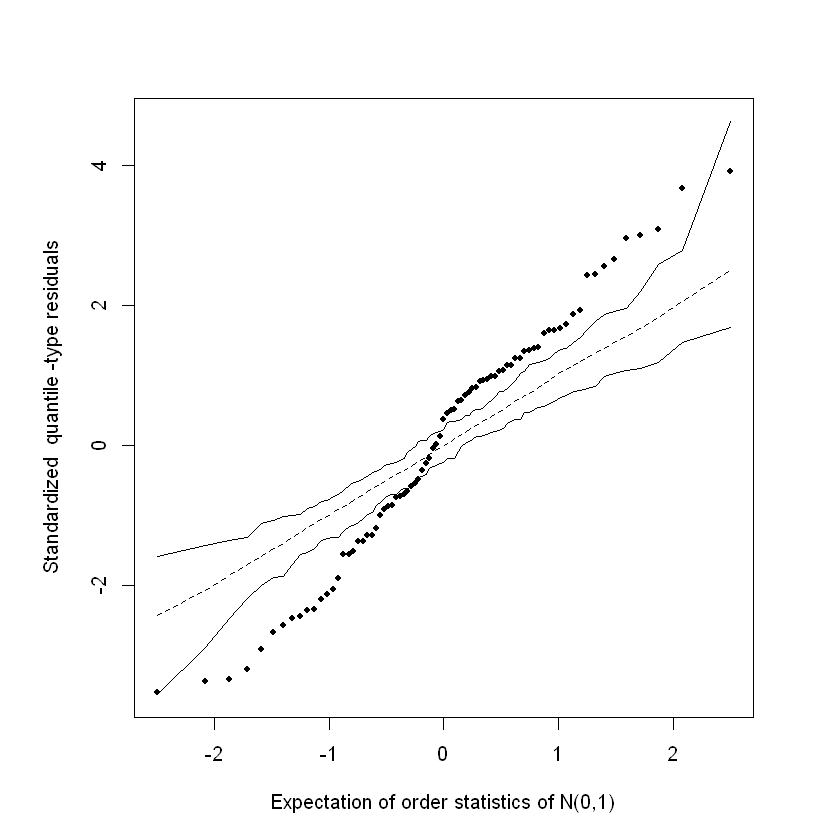

In [18]:
envelope_glm(fit11,rep=100)

# B)

Ajuste modelos beta-binomial con funciones de enlace logit, probit y complemento log-log, y las covariables categóricas dosis de PHT, dosis de TCPO, y la interacción entre estas. Use los criterios AIC y BIC para seleccionar el “mejor” modelo. Compare con lo obtenido en (A), especialmente las magnitudes de los errores estándar.


En este tipo de modelo los pesos (weigths) no significa lo mismo que los $m_k$ y es necesario colocarlo en términos de éxitos y fracasos, en este orden de ideas se obtiene el ajuste de los siguientes modelos:

In [21]:
###################### Estimación del modelo ######################
fit21 <- overglm(cbind(ossification,fetuses-ossification) ~ factor(pht) * factor(tcpo), family="bb(logit)",data=tera)
fit22 <- overglm(cbind(ossification,fetuses-ossification) ~ factor(pht) * factor(tcpo), family="bb(probit)", data=tera)
fit23 <- overglm(cbind(ossification,fetuses-ossification) ~ factor(pht) * factor(tcpo), family="bb(cloglog)", data=tera)
AIC(fit21,fit22,fit23)
BIC(fit21,fit22,fit23)



  Family:  Beta-Binomial 
Predictor:  1 + factor(pht) + factor(tcpo) + factor(pht):factor(tcpo) 

 Object    Link -2*log-likelihood df     AIC 
  fit21   logit          306.5751  5 316.5751
  fit22  probit          306.5751  5 316.5751
  fit23 cloglog          306.5751  5 316.5751


  Family:  Beta-Binomial 
Predictor:  1 + factor(pht) + factor(tcpo) + factor(pht):factor(tcpo) 

 Object    Link -2*log-likelihood df     BIC 
  fit21   logit          306.5751  5 328.5474
  fit22  probit          306.5751  5 328.5474
  fit23 cloglog          306.5751  5 328.5474


Seún lasel AIC, BIC, se puede decir que son iguales, en consecuencia se procede a seleccionar la que tiene funcion de enlace canonica.

In [24]:
summary(fit21)


Sample size:  81 
     Family:  Beta-Binomial
       Link:  logit
 *************************************************************
                              Estimate Std.Error  z-value   Pr(>|z|)
(Intercept)                    0.70428   0.23408  3.00871  0.0026236
factor(pht)60                 -1.69172   0.40181 -4.21030 2.5503e-05
factor(tcpo)100               -0.78222   0.40166 -1.94745  0.0514804
factor(pht)60:factor(tcpo)100  0.67698   0.69019  0.98087  0.3266563

                              Estimate Std.Error
Dispersion                     0.50912   0.12332
 *************************************************************
                 -2*log-likelihood:  306.575 
                               AIC:  316.575 
                               BIC:  328.547 


   Según los valores de los parámetros se puede decir que uno de los factores se contrarrestra con el otro al verse que $\beta_4 = 0.67698$, sin embargo ese efecto no es significativo lo cual implica que no hay interacción. 

# C)

Use los criterios AIC y BIC para comparar los modelos seleccionados en (A) y (B). Cual de ellos parece describir mejor los datos?

In [22]:
AIC(fit11,fit21)
BIC(fit11,fit21)

,df,AIC
fit11,4,409.7828
fit21,5,316.5751


,df,BIC
fit11,4,419.3606
fit21,5,NA


En correspondencia al AIC, BIC se selecciona el modelo beta-binomial con función de enlace canonica.

# D) 
Use los tests de Wald y razón de verosimilitudes para evaluar, al nivel de significancia aproximado de 5%, si existe evidencia de sinergia entre las dos sustancias aplicadas para inducir efectos teratogénicos.

### Test Wald
Para contrastar la prueba se tiene el siguiente sistema de hipótesis:

$$H_{0}: \beta_4=0 \;\;\;\;\; vs \;\;\;\;\;\;H_{1}: \beta_4 \neq 0 $$

donde 

$$ \xi _{W} = (\hat{\beta_4}  - \beta_4^{0})' [\hat{Var}(\hat{\beta_4})]^{-1}(\hat{\beta_4}  - \beta_4^{0})$$


In [27]:
fit <-  overglm(cbind(ossification,fetuses-ossification) ~ factor(pht) + factor(tcpo), family="bb(logit)",data=tera)
anova_glm(fit21,fit,test="wald") #test de wald


  Wald test 

 Model 1:  cbind(ossification, fetuses - ossification) ~ factor(pht) * factor(tcpo) 
 Model 2:  cbind(ossification, fetuses - ossification) ~ factor(pht) + factor(tcpo) 

    Chi    Df   Pr(>Chi)
  0.96211   1     0.3267


Considerando las anteriores salidas NO se rechaza $H_0$ a un nivel de significancia APROXIMADO del 100$ \alpha \%$ puesto que $\xi _{W}=0.96211 >\chi^2(1)$ Afirmandose que $\beta_4$ NO es significativo en el modelo. Es decír **no existe evidencia estadisticamente significativa para afirmar que la sinergia entre las sustancias aplicadas induce efectos teratogénicos..**

In [28]:
anova_glm(fit21,fit, test = "lrt")  


  Likelihood-ratio test 

 Model 1:  cbind(ossification, fetuses - ossification) ~ factor(pht) * factor(tcpo) 
 Model 2:  cbind(ossification, fetuses - ossification) ~ factor(pht) + factor(tcpo) 

    Chi    Df   Pr(>Chi)
  0.93894   1     0.3326


Como el caso del test de wald, en el test de razón de verosimilitudes NO se rechaza $H_0$ a un nivel de significancia APROXIMADO del 100$ \alpha \%$ puesto que $\xi _{W}=0.93894  >\chi^2(1)$ Afirmandose que $\beta_4$ NO es significativo en el modelo. Es decír **no existe evidencia estadisticamente significativa para afirmar que la sinergia entre las sustancias aplicadas induce efectos teratogénicos..**

# E) 

Interprete las estimaciones de los parámetros del modelo excepto el intercepto.

In [30]:
summary(fit)


Sample size:  81 
     Family:  Beta-Binomial
       Link:  logit
 *************************************************************
                Estimate Std.Error  z-value   Pr(>|z|)
(Intercept)      0.62824   0.22000  2.85567  0.0042947
factor(pht)60   -1.47991   0.33643 -4.39884 1.0883e-05
factor(tcpo)100 -0.55950   0.33292 -1.68061  0.0928387

                Estimate Std.Error
Dispersion       0.52070   0.12513
 *************************************************************
                 -2*log-likelihood:  307.514 
                               AIC:  315.514 
                               BIC:  325.092 


Al tratarse de la función de enlace **logit** donde:

$$log(\frac{\mu_k}{1-\mu_k})= \beta_1 + \beta_2 Pht60_{k} +  \beta_3 Tcpo100_{k}$$

--- 

Aplicando exponencial y considerando que  **Tcpo100=1** se tiene:

 $$\frac{\mu_k}{1-\mu_k} = \frac{ exp[ \beta_1 + \beta_2 Pht60_{k} +  \beta_3 Tcpo100_{k}]}{ exp[ \beta_1 + \beta_2 Pht60_{k} +  \beta_3 Tcpo100_{k}]} = exp(\beta_3)=exp(-0.5595) $$
 
Al suponer que $\hat{\beta}_3=-0.5595$, se tiene:

  $$exp(\hat{\beta}_3) = exp(-0.5595)=  0.571$$
 
* **Interpretación Tcpo:** Al comparar dos ratas embarazadas, las dos con la misma dosis de **Pht** una con dosis TCPO100 y otra con TCPO0. El chance de tener una rata con efectos teratogénicos con dosis de TCPO100 es $42\%$ menor que la raa con dosis TCPO0.

---

Aplicando exponencial y considerando que  **Pht60=1** se tiene:

 $$\frac{\mu_k}{1-\mu_k} = \frac{ exp[ \beta_1 + \beta_2 Pht60_{k} +  \beta_3 Tcpo100_{k}]}{ exp[ \beta_1 + \beta_2 Pht60_{k} +  \beta_3 Tcpo100_{k}]} = exp(\beta_3)=exp(-1.47991) $$
 
Al suponer que $\hat{\beta}_2=-1.47991$, se tiene:

  $$exp(\hat{\beta}_2) = exp(-1.47991)=  0.2276$$
 
* **Interpretación Pht60:** Al comparar dos ratas embarazadas, las dos con la misma dosis de **TCPO** una con dosis Pht60 y otra con Pht0. El chance de tener una rata con efectos teratogénicos con dosis de Pht60 es $22\%$ menor que la rata con dosis TCPO0.